In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filename='/kaggle/input/stock-exchange-data/indexData.csv'
df=pd.read_csv(filename)
df.head()
df['Index'].unique()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-exchange-data/indexProcessed.csv
/kaggle/input/stock-exchange-data/indexData.csv
/kaggle/input/stock-exchange-data/indexInfo.csv


array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [3]:
## NYA
df_1=df[df['Index']=='NYA']
df_1.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [177]:
## linear regresion finding best fit line using weights - y = wx + b
## univariate regression to forecast closing price by date

df_temp=df_1[(df_1['Date']>='2021-03-01') & (df_1['Date']<='2021-06-03')]
df_temp.sort_values(by='Date',ascending=False)
display(df_temp)
df_temp.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13884,NYA,2021-03-01,15010.46973,15396.51953,15010.46973,15327.76953,15327.76953,5.071540e+09
13885,NYA,2021-03-02,15327.76953,15366.91992,15257.91992,15277.01953,15277.01953,5.493690e+09
13886,NYA,2021-03-03,15277.01953,15336.34961,15197.91992,15199.19043,15199.19043,6.150790e+09
13887,NYA,2021-03-04,15199.19043,15246.98047,14765.54981,14959.41016,14959.41016,7.142240e+09
13888,NYA,2021-03-05,14959.41016,15284.16016,14818.54981,15251.83008,15251.83008,6.842570e+09
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.00000,16508.51953,16375.00000,16464.68945,16464.68945,2.947400e+09
13944,NYA,2021-05-25,16464.68945,16525.81055,16375.15039,16390.18945,16390.18945,3.420870e+09
13945,NYA,2021-05-26,16390.18945,16466.33984,16388.32031,16451.96094,16451.96094,3.674490e+09
13946,NYA,2021-05-27,16451.96094,16546.35938,16451.96094,16531.94922,16531.94922,5.201110e+09


,Index,Date,Open,High,Low,Close,Adj Close,Volume
13884,NYA,2021-03-01,15010.46973,15396.51953,15010.46973,15327.76953,15327.76953,5.071540e+09
13885,NYA,2021-03-02,15327.76953,15366.91992,15257.91992,15277.01953,15277.01953,5.493690e+09
13886,NYA,2021-03-03,15277.01953,15336.34961,15197.91992,15199.19043,15199.19043,6.150790e+09
13887,NYA,2021-03-04,15199.19043,15246.98047,14765.54981,14959.41016,14959.41016,7.142240e+09
13888,NYA,2021-03-05,14959.41016,15284.16016,14818.54981,15251.83008,15251.83008,6.842570e+09
13889,NYA,2021-03-08,15251.83008,15471.91016,15236.92969,15288.37988,15288.37988,5.852240e+09
13890,NYA,2021-03-09,15288.37988,15498.08984,15288.37988,15375.62988,15375.62988,5.496340e+09
13891,NYA,2021-03-10,15375.62988,15573.26953,15375.62988,15521.83984,15521.83984,5.827250e+09
13892,NYA,2021-03-11,15521.83984,15701.82031,15521.83984,15648.00000,15648.00000,5.300010e+09
13893,NYA,2021-03-12,15648.00000,15717.80957,15607.79981,15715.20996,15715.20996,4.469240e+09


In [13]:
# steps 
# 1) Split train, test data
# 2) initialize weights - w,b
# 3) compute y hat or predicted y value
# 4) compute error and gradients.
# 5) Iterate gradient descent to find ideal weight and bias.
# 6) Predict y and mse. 

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_temp=df_temp[['Volume','Close']]
df_temp.head(40)
scaler=StandardScaler()
df_temp_scaled=scaler.fit_transform(df_temp)
df_temp=pd.DataFrame(df_temp_scaled,columns=df_temp.columns)

x=df_temp['Volume'].values
y=df_temp['Close'].values
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20)
display(X_train)
display(Y_train)

array([-1.11393957, -0.99333065, -0.12999173,  0.2780469 , -1.17248379,
       -0.314362  , -0.34966243, -0.21228871, -0.40410292, -0.69390791,
       -0.92474453, -0.34842177, -0.25978365,  0.21987383, -0.62058184,
       -0.2694014 , -0.71030156, -0.72439417, -0.34987451, -0.37948064,
        0.89442065, -0.66718605, -1.0741855 , -0.07283663, -0.48323994,
       -0.08901821,  0.08849132,  0.19510308, -0.33344904,  0.43408351,
        1.17726946, -0.04904145, -0.02056994, -0.84602107, -0.83723042,
       -0.82618114, -0.65607314, -0.76636446,  0.99929336,  1.55837416,
        0.11835195, -0.36537743,  2.95277832,  0.26217284,  0.61839014,
       -0.71964361, -0.60400792, -0.16792193, -1.49539419,  1.58487334,
        0.30508688])

array([ 1.13632785,  1.05731654,  0.19040314, -0.81916996,  1.11800066,
        0.90072546, -0.177657  ,  0.56571974,  0.11694132,  0.77552183,
        0.67910864,  0.95658763, -0.27195115, -0.84361642,  0.89322648,
       -0.78486062,  0.5544842 ,  1.20624618,  0.39830046, -0.19602893,
        1.39909608,  0.02578096,  1.02069512,  1.0231061 , -0.15692353,
        0.64537852,  0.81400093, -0.5316115 , -0.87411622, -1.62761952,
       -0.64880993, -0.96460084, -0.01696444,  0.93083914,  0.61324   ,
        0.06223522,  0.69813041,  0.0113881 , -0.73208518, -1.03625442,
       -0.57004351,  1.54009115, -2.39225946, -0.68073182, -1.30500536,
        1.36264418,  0.37590239,  1.45626262,  1.23693432, -1.59912102,
       -1.45892177])

In [182]:
## return y_pred

def pred(x,w,b):  
    m=x.shape[0]
    y_hat = np.dot(w,x) + b
    print(y_hat)
    return y_hat

In [207]:
Y_pred=pred(X_train,4,5)
print(X_train.shape)
print(Y_pred.shape)
print(Y_train.shape)

[ 0.54424171  1.02667741  4.48003307  6.11218761  0.31006486  3.74255202
  3.60135029  4.15084515  3.3835883   2.22436836  1.30102189  3.60631292
  3.96086541  5.8794953   2.51767263  3.92239441  2.15879375  2.10242334
  3.60050198  3.48207746  8.57768258  2.33125581  0.70325801  4.70865347
  3.06704024  4.64392717  5.3539653   5.78041233  3.66620383  6.73633402
  9.70907786  4.80383421  4.91772025  1.61591574  1.65107832  1.69527543
  2.37570742  1.93454216  8.99717345 11.23349662  5.47340779  3.53849028
 16.81111329  6.04869137  7.47356058  2.12142555  2.58396831  4.32831226
 -0.98157677 11.33949335  6.22034754]
(51,)
(51,)
(51,)


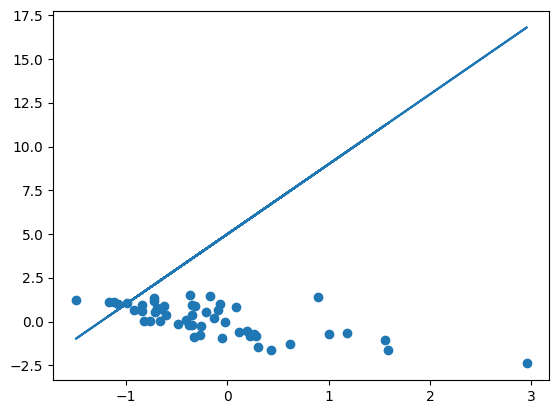

In [208]:
import matplotlib.pyplot as plt
# Plot the linear fit
plt.plot(X_train, Y_pred)
# # Create a scatter plot of the data. 
plt.scatter(X_train, Y_train) 

In [210]:
## takes w,b values and computes partial deriviates df_dw, df_db

def compute_gradient(x,y,w,b):
    m=x.shape[0]
    df_dw=0
    df_db=0
    for i in range(m):
        y_hat=w*x[i]+b
        df_dw+=((y_hat-y[i])*x[i])
        df_db+=(y_hat-y[i])
    
    df_dw = round(df_dw / m, 5)
    df_db = round(df_db / m, 5)

    return df_dw,df_db

In [211]:
compute_gradient(X_train,Y_train,4,5)

(2.34828, 4.22531)

In [212]:
## returns mean square loss
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    y_hat=np.dot(w,x)+b
    cost = np.sum((y_hat - y) ** 2) / (2 * m)
    return round(cost,4)
    

In [214]:
import math
def gradient_descent(max_iterations,alpha,x,y,w,b):
    m=x.shape
    J_history=[]
    P_history=[]
    
    for i in range(max_iterations):
        try:
            df_dw,df_db=compute_gradient(x,y,w,b)
            # update parameters
            w=w-(alpha*df_dw)
            b=b-(alpha*df_db)
            if i<100000:
                J_history.append(compute_cost(x,y,w,b))
                P_history.append([w,b])
            if i% math.ceil(max_iterations/10) == 0:
                print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                      f"dj_dw: {df_dw: 0.3e}, dj_db: {df_db: 0.3e}  ",
                      f"w: {w: 0.3e}, b:{b: 0.5e}")
        except:
            print(i)
            
    return w,b,J_history,P_history     
    
    

In [215]:
## calculate parameters
w_final,b_final,J_history,P_history=gradient_descent(10000,1.0e-2,X_train,Y_train,0,0
                                                    )

Iteration    0: Cost 4.49e-01  dj_dw:  5.444e-01, dj_db: -1.191e-01   w: -5.444e-03, b: 1.19140e-03
Iteration 1000: Cost 2.26e-01  dj_dw:  1.150e-03, dj_db:  4.500e-04   w: -8.326e-01, b:-1.68570e-02
Iteration 2000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 3000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 4000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 5000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 6000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 7000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 8000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02
Iteration 9000: Cost 2.26e-01  dj_dw:  0.000e+00, dj_db:  0.000e+00   w: -8.345e-01, b:-1.76189e-02


In [216]:
print(f'final w {w_final} final b {b_final} final cost {J_history[-1]}')

final w -0.8345230999999883 final b -0.01761889999999993 final cost 0.2263


In [217]:
# predict using model weights
Y_pred=np.dot(w_final,X_test)+b_final
Y_pred

array([ 0.65891965, -0.48181453, -0.64937435, -2.21659629,  0.1650186 ,
       -0.14790723, -1.60442553,  0.4175928 , -1.02528887, -1.02294383,
        0.53328739, -2.99752153,  1.16690865])

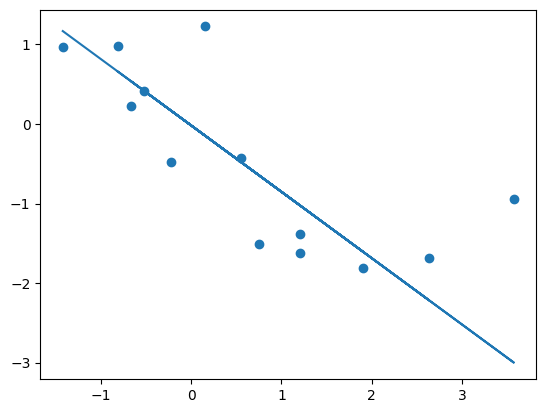

In [219]:
import matplotlib.pyplot as plt
# Plot the linear fit
plt.plot(X_test, Y_pred)
# # Create a scatter plot of the data. 
plt.scatter(X_test, Y_test) 